In [ ]:
import datetime
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web


In [ ]:
#window length for moving average

length = 14

In [ ]:
#connect to dataframe
Stocks = pd.read_excel('/CAPSTOCKS.xlsx')
Stocks

,Date,Close
0,2014-01-02 16:59:59.712,20950.0
1,2014-01-03 16:59:59.712,20704.0
2,2014-01-06 16:59:59.712,20340.0
3,2014-01-07 16:59:59.712,20900.0
4,2014-01-08 16:59:59.712,20700.0
...,...,...
2492,2023-12-21 16:59:59.712,192544.0
2493,2023-12-22 12:02:00.096,198500.0
2494,2023-12-27 16:59:59.712,199796.0
2495,2023-12-28 16:59:59.712,200505.0


In [ ]:

#Connecting the closing price data back to the datframe

close = pd.Series(Stocks['Close'])
close

,Close
0,20950.0
1,20704.0
2,20340.0
3,20900.0
4,20700.0
...,...
2492,192544.0
2493,198500.0
2494,199796.0
2495,200505.0


In [ ]:
def calc_rsi(over: pd.Series, fn_roll:Callable):
  #Get the diference in price from previous step
  delta = over.diff()
  #Get rid of the first row, which is NaN since it did not have a previous row to calculate the differences \
  delta = delta[1:]

  #Make the positive gains (up) and negative gains (down) Series
  up, down = delta.clip(lower=0), delta.clip(upper=0).abs()

  roll_up, roll_down = fn_roll(up), fn_roll(down)
  rs = roll_up/roll_down
  rsi = 100.0 - (100.0/(1.0 + rs))

  #Avoid division-by-zero if 'roll_down' is zero
  #This prevents inf and/or nan values
  rsi[:] = np.select([roll_down == 0,roll_up == 0,True], [100,0,rsi])
  #rsi = rsi.case_when([((roll_down == 0)100),((roll_up == 0 ),0)])#This alternative to np.select works only for pd.__version__>=2.2.0
  rsi.name = 'rsi'

  # Assert range
  valid_rsi = rsi[length-1:]
  assert ((0<= valid_rsi) & (valid_rsi <= 100)).all()

  return rsi

#Calculate RSI using MA between exponential moving average and short term moving average

rsi_ema = calc_rsi(close, lambda s: s.ewm(span= length).mean())
rsi_sma = calc_rsi(close, lambda s: s.rolling(length).mean())




In [ ]:
Stocks['EMA'] = rsi_ema
Stocks['SMA'] = rsi_sma
Stocks.head(40)

,Date,Close,SMA,EMA
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN
1,2014-01-03 16:59:59.712,20704.0,NaN,0.000000
2,2014-01-06 16:59:59.712,20340.0,NaN,0.000000
3,2014-01-07 16:59:59.712,20900.0,NaN,52.818230
4,2014-01-08 16:59:59.712,20700.0,NaN,43.376917
5,2014-01-09 16:59:59.712,20670.0,NaN,42.075208
6,2014-01-10 16:59:59.712,20300.0,NaN,29.483945
7,2014-01-13 16:59:59.712,20400.0,NaN,35.503005
8,2014-01-14 16:59:59.712,20360.0,NaN,34.157353
9,2014-01-15 16:59:59.712,20600.0,NaN,47.843352


In [ ]:
Stocks['Signal'] = 0
Stocks.loc[Stocks['SMA'] > Stocks['EMA'], 'Signal'] = 1
Stocks.loc[Stocks['SMA'] < Stocks['EMA'], 'Signal'] = -1
Stocks.head(40)

,Date,Close,SMA,EMA,Signal
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN,0
1,2014-01-03 16:59:59.712,20704.0,NaN,0.000000,0
2,2014-01-06 16:59:59.712,20340.0,NaN,0.000000,0
3,2014-01-07 16:59:59.712,20900.0,NaN,52.818230,0
4,2014-01-08 16:59:59.712,20700.0,NaN,43.376917,0
5,2014-01-09 16:59:59.712,20670.0,NaN,42.075208,0
6,2014-01-10 16:59:59.712,20300.0,NaN,29.483945,0
7,2014-01-13 16:59:59.712,20400.0,NaN,35.503005,0
8,2014-01-14 16:59:59.712,20360.0,NaN,34.157353,0
9,2014-01-15 16:59:59.712,20600.0,NaN,47.843352,0


In [ ]:
for i in  range(len(Stocks)-2,28,-1):
     if Stocks.loc[i+1, 'Signal'] == Stocks.loc[i, 'Signal']:
        Stocks.loc[i+1, 'Signal'] = 0

Stocks.loc[29,'Signal']=0
Stocks.head(40)

,Date,Close,SMA,EMA,Signal
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN,0
1,2014-01-03 16:59:59.712,20704.0,NaN,0.000000,0
2,2014-01-06 16:59:59.712,20340.0,NaN,0.000000,0
3,2014-01-07 16:59:59.712,20900.0,NaN,52.818230,0
4,2014-01-08 16:59:59.712,20700.0,NaN,43.376917,0
5,2014-01-09 16:59:59.712,20670.0,NaN,42.075208,0
6,2014-01-10 16:59:59.712,20300.0,NaN,29.483945,0
7,2014-01-13 16:59:59.712,20400.0,NaN,35.503005,0
8,2014-01-14 16:59:59.712,20360.0,NaN,34.157353,0
9,2014-01-15 16:59:59.712,20600.0,NaN,47.843352,0


In [ ]:
Stocks.tail(40)

,Date,Close,SMA,EMA,Signal
2457,2023-11-01 16:59:59.712,166021.0,23.030173,37.365632,0
2458,2023-11-02 16:59:59.712,175623.0,49.915048,67.648320,0
2459,2023-11-03 16:59:59.712,185496.0,61.733863,79.441113,0
2460,2023-11-06 16:59:59.712,188000.0,63.908294,81.422792,0
2461,2023-11-07 16:59:59.712,187500.0,68.628513,79.653808,0
2462,2023-11-08 16:59:59.712,191082.0,74.223435,82.751467,0
2463,2023-11-09 16:59:59.712,189100.0,79.678679,75.420430,1
2464,2023-11-10 16:59:59.712,191691.0,79.980248,78.317804,0
2465,2023-11-13 16:59:59.712,192413.0,80.053859,79.109568,0
2466,2023-11-14 16:59:59.712,195500.0,82.922011,82.298527,0


In [ ]:
for i in range(len(Stocks) - 2, 2496, -1):
        if Stocks.loc[i + 1, 'Signal'] == Stocks.loc[i, 'Signal']:
            Stocks.loc[i + 1, 'Signal'] = 0
#Explicitely start the first rows signal to 0
Stocks.loc[29, 'Signal'] = 0
Stocks.tail(40)

,Date,Close,SMA,EMA,Signal
2457,2023-11-01 16:59:59.712,166021.0,23.030173,37.365632,0
2458,2023-11-02 16:59:59.712,175623.0,49.915048,67.648320,0
2459,2023-11-03 16:59:59.712,185496.0,61.733863,79.441113,0
2460,2023-11-06 16:59:59.712,188000.0,63.908294,81.422792,0
2461,2023-11-07 16:59:59.712,187500.0,68.628513,79.653808,0
2462,2023-11-08 16:59:59.712,191082.0,74.223435,82.751467,0
2463,2023-11-09 16:59:59.712,189100.0,79.678679,75.420430,1
2464,2023-11-10 16:59:59.712,191691.0,79.980248,78.317804,0
2465,2023-11-13 16:59:59.712,192413.0,80.053859,79.109568,0
2466,2023-11-14 16:59:59.712,195500.0,82.922011,82.298527,0


In [ ]:
def ensure_non_consecutive_signals(df: pd.DataFrame, signal_column: str, start_row: int, end_row: int):
    """
    Ensures that signals in the specified column of the DataFrame are not consecutive.
    If consecutive signals are found, the following signal is set to 0.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the signals.
    - signal_column (str): The name of the column containing signals.
    - start_row (int): The row index to start the check from.
    - end_row (int): The row index to end the check at (inclusive).

    Returns:
    - pd.DataFrame: The DataFrame with adjusted signals.
    """
    # Ensure the start_row and end_row are within the bounds of the DataFrame
    if start_row < 0 or end_row >= len(df):
        raise ValueError("start_row and end_row must be within the bounds of the DataFrame.")

    # Iterate over the range from start_row to end_row
    for i in range(len(df) - 2, end_row, -1):
        if df.loc[i + 1, signal_column] == df.loc[i, signal_column]:
            df.loc[i + 1, signal_column] = 0

    # Explicitly set the signal at the start_row to 0
    df.loc[start_row, signal_column] = 0

    return df

# Example usage:
# Assuming 'Stocks' is your DataFrame and 'Signal' is the column to check
Stocks = ensure_non_consecutive_signals(Stocks, 'Signal', 29, 28)
print(Stocks.head(40))

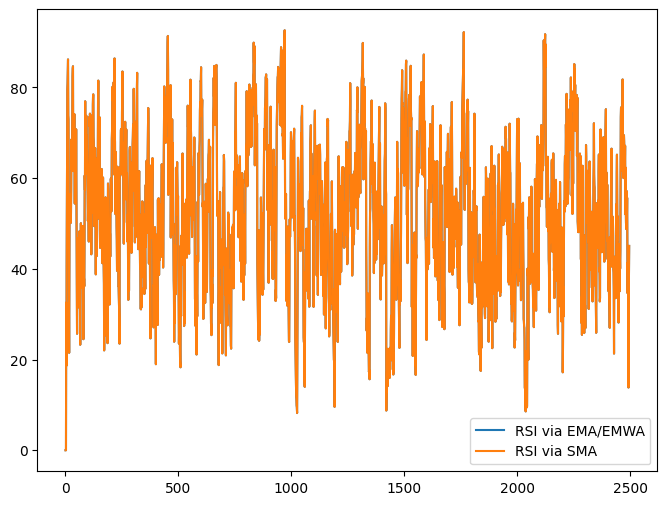

In [ ]:
#Graphing the changes on the signals

plt.figure(figsize=(8,6))
rsi_ema.plot(), rsi_ema.plot(),
plt.legend(['RSI via EMA/EMWA','RSI via SMA','RSI via RMA/SMMA/MMA (TradingView)'])
plt.show()

In [ ]:
Stocks['Signal'] = 0
Stocks.loc[Stocks['SMA'] > Stocks['EMA'], 'Signal'] = 1
Stocks.loc[Stocks['SMA'] < Stocks['EMA'], 'Signal'] = -1
Stocks.head(40)


,Date,Close,EMA,SMA,Signal,EMA
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN,0,NaN
1,2014-01-03 16:59:59.712,20704.0,0.000000,NaN,0,0.000000
2,2014-01-06 16:59:59.712,20340.0,0.000000,NaN,0,0.000000
3,2014-01-07 16:59:59.712,20900.0,52.818230,NaN,0,52.818230
4,2014-01-08 16:59:59.712,20700.0,43.376917,NaN,0,43.376917
5,2014-01-09 16:59:59.712,20670.0,42.075208,NaN,0,42.075208
6,2014-01-10 16:59:59.712,20300.0,29.483945,NaN,0,29.483945
7,2014-01-13 16:59:59.712,20400.0,35.503005,NaN,0,35.503005
8,2014-01-14 16:59:59.712,20360.0,34.157353,NaN,0,34.157353
9,2014-01-15 16:59:59.712,20600.0,47.843352,NaN,0,47.843352


In [ ]:
for i in  range(len(Stocks)-2,28,-1):
     if Stocks.loc[i+1, 'Signal'] == Stocks.loc[i, 'Signal']:
        Stocks.loc[i+1, 'Signal'] = 0

     Stocks.loc[29,'Signal']=0
     Stocks.head(40)

In [ ]:
Stocks.head(40)

,Date,Close,EMA,SMA,Signal,EMA
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN,0,NaN
1,2014-01-03 16:59:59.712,20704.0,0.000000,NaN,0,0.000000
2,2014-01-06 16:59:59.712,20340.0,0.000000,NaN,0,0.000000
3,2014-01-07 16:59:59.712,20900.0,52.818230,NaN,0,52.818230
4,2014-01-08 16:59:59.712,20700.0,43.376917,NaN,0,43.376917
5,2014-01-09 16:59:59.712,20670.0,42.075208,NaN,0,42.075208
6,2014-01-10 16:59:59.712,20300.0,29.483945,NaN,0,29.483945
7,2014-01-13 16:59:59.712,20400.0,35.503005,NaN,0,35.503005
8,2014-01-14 16:59:59.712,20360.0,34.157353,NaN,0,34.157353
9,2014-01-15 16:59:59.712,20600.0,47.843352,NaN,0,47.843352


In [ ]:

|RSI_Mean = Stocks['RSI'].mean()

#Buy signal when RSI is significanlty below the mean

Stocks['Signal'] = 0
Stocks.loc[(Stocks['RSI'] < RSI_Mean) & (Stocks['RSI'].shift(1) > RSI_Mean - 10 ), 'Signal'] = 1

#Sell signal when RSI is significantly above the mean
Stocks.loc[(Stocks['RSI'] > RSI_Mean) & (Stocks['RSI'].shift(1) < RSI_Mean + 10), 'Signal'] = -1

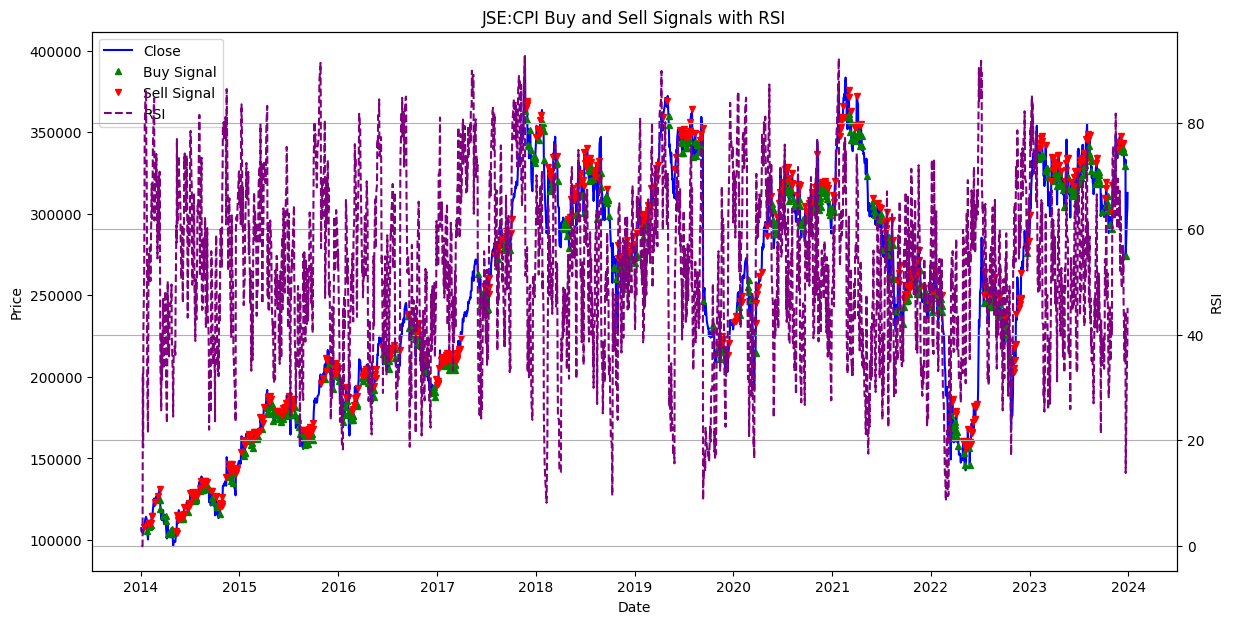

In [ ]:

plt.figure(figsize=(14, 7))

# Plotting the Close prices
plt.plot(Stocks['Date'], Stocks['Close'], label='Close', color='blue')

# Plotting Buy Signals
plt.plot(Stocks[Stocks['Signal'] == 1]['Date'],
         Stocks[Stocks['Signal'] == 1]['Close'],
         '^', markersize=5, color='green', label='Buy Signal')

# Plotting Sell Signals
plt.plot(Stocks[Stocks['Signal'] == -1]['Date'],
         Stocks[Stocks['Signal'] == -1]['Close'],
         'v', markersize=5, color='red', label='Sell Signal')

# Adding a secondary y-axis for the RSI
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plotting the RSI
ax2.plot(Stocks['Date'], Stocks['RSI'], label='RSI', color='purple', linestyle='--')

# Setting labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('RSI')

plt.title('JSE:CPI Buy and Sell Signals with RSI')

# Combining legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

plt.grid(True)
plt.show()

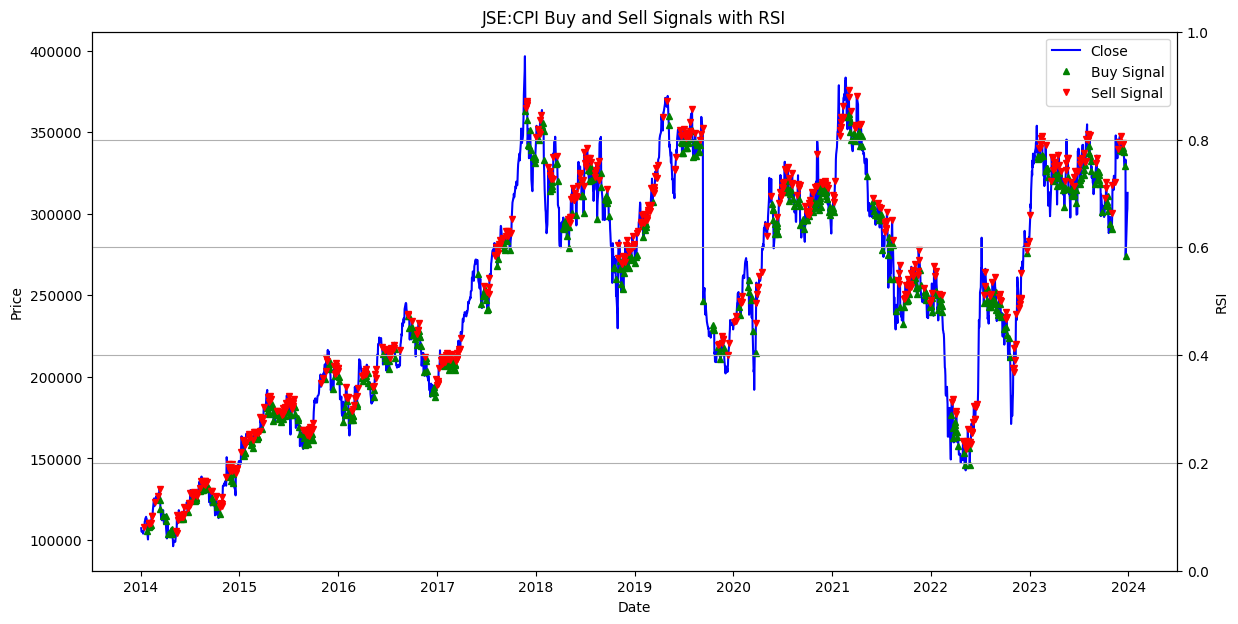

In [ ]:
plt.figure(figsize=(14, 7))

# Plotting the Close prices
plt.plot(Stocks['Date'], Stocks['Close'], label='Close', color='blue')

# Plotting Buy Signals
plt.plot(Stocks[Stocks['Signal'] == 1]['Date'],
         Stocks[Stocks['Signal'] == 1]['Close'],
         '^', markersize=5, color='green', label='Buy Signal')

# Plotting Sell Signals
plt.plot(Stocks[Stocks['Signal'] == -1]['Date'],
         Stocks[Stocks['Signal'] == -1]['Close'],
         'v', markersize=5, color='red', label='Sell Signal')

# Adding a secondary y-axis for the RSI
ax1 = plt.gca()
ax2 = ax1.twinx()



# Setting labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('RSI')

plt.title('JSE:CPI Buy and Sell Signals with RSI')

# Combining legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

plt.grid(True)
plt.show()